<a href="https://colab.research.google.com/github/ibader85/AdvancedAnalytics/blob/main/13_Using_Public_Datasets_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

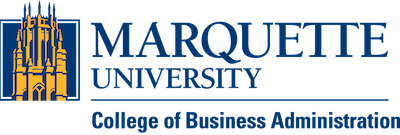

# BUAN 4061: Advanced Business Analytics
# Using Public datasets 2

## Flow from Directory

Instructor: Dr. Badar Al Lawati

**Acknowledgment**: This material is based on the content created by `Dr. Kambiz Saffarizadeh`

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data
##Download the Dataset

In [2]:
# Download from Google Drive
!gdown --id 1tuMKLvmr0z1kQpCJYfX5SmYDOqHYeMrm

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1tuMKLvmr0z1kQpCJYfX5SmYDOqHYeMrm
From (redirected): https://drive.google.com/uc?id=1tuMKLvmr0z1kQpCJYfX5SmYDOqHYeMrm&confirm=t&uuid=642e32d5-0d3a-4a0e-9810-f4ecc8931dee
To: /content/rps.zip
100% 237M/237M [00:01<00:00, 182MB/s]


In [ ]:
# Sample
# Download from any website #1

import requests

url = "http://example.com/file.zip"
response = requests.get(url)
with open("file.zip", "wb") as file:
    file.write(response.content)

In [ ]:
# Sample
# Download from any website #2

import urllib.request

url = "http://example.com/file.zip"
urllib.request.urlretrieve(url, "file.zip")


In [ ]:
# Sample
# Download from any website #3

import wget

url = "http://example.com/file.zip"
wget.download(url, "file.zip")


##Unzip the Dataset

In [3]:
import os
import zipfile

zip_ref = zipfile.ZipFile('rps.zip', 'r')
zip_ref.extractall()
zip_ref.close()

##Augment the Dataset
- Rotate each image randomly -40 to 40 degrees
- Shift each image 0% to 20% vertically or horizontally
- Shear each image by up to 20%
- Zoom each image by up to 20%
- Randomly flip each image horizontally or vertically
- Fill in any missing pixels after a shift or shear with nearest neighbors

In [4]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [5]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

##Flow from Directroy

`flow_from_directory` is a method provided by the Keras ImageDataGenerator class for loading images from a directory on disk. It is commonly used in deep learning tasks involving image data, such as image classification or object detection.

In [6]:
train_generator = training_datagen.flow_from_directory(
	'rps/train/',
	target_size=(150,150),
	class_mode='categorical'
)

Found 2520 images belonging to 3 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
	'rps/validation/',
	target_size=(150,150),
	class_mode='categorical'
)

Found 33 images belonging to 3 classes.


In [8]:
test_generator = validation_datagen.flow_from_directory(
	'rps/test/',
	target_size=(150,150),
	class_mode='categorical'
)

Found 372 images belonging to 3 classes.


##Model

In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3)
])

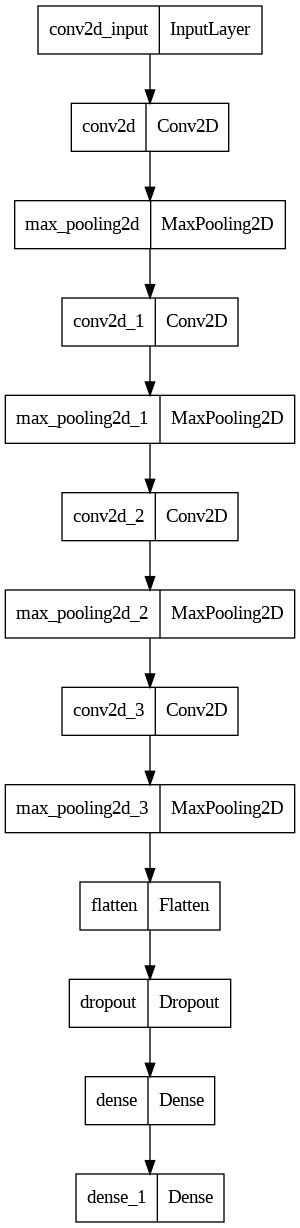

In [10]:
tf.keras.utils.plot_model(model)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

**Making sense of the number parameters in conv2D layers**

To understand the number of parameters you can think about how many coefficients you need to calculate for each layer.

For example in the first `conv2D` layer we need to calculate the coefficients for 64 filters. Each filter has a 3x3 kernel. Since the image is RGB colored, each filter requires 3 sets of 3x3 coefficients (one set per color channel, i.e., R, G, and B). So for each filter we need to calculate 3x3x3 = 27 coefficients. We also need an intercept (aka bias) term for each filter. So in total we need 3x3x3 + 1 = 28 coefficients per filter. We have 64 filters in this layer so in total we have 64x(3x3x3 + 1) = 1792 coefficients to calculate.

The general formula for caluclating the number of parameters in a `conv2D` layer is k(nml+1), where k is the number of filters, n and m are the dimensions of the kernel, and l is the number of channels. Therefore, for instance, for the second `conv2D` layer the number of parameters is calculated as 128x(3x3x64+1)=73856. Please note that for this layer we have 64 channels as the previous `conv2D` layer converted the 3 channels to 64 channels.

`RMSprop` (Root Mean Square Propagation) is an optimization algorithm commonly used in training deep learning models, particularly for neural networks with recurrent layers like LSTM or GRU. It is an extension of the gradient descent optimization algorithm.

The `RMSprop` optimizer adapts the learning rate for each parameter during training. It does this by dividing the learning rate for a weight by the square root of the mean of the squares of the gradients for that weight. This helps prevent the learning rate from decreasing too rapidly when the gradient is large and from increasing too slowly when the gradient is small.

In [12]:
# alternatively we can use the 'rmsprop' optimzier instead of 'adam'
model.compile(optimizer='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

Epoch 1/10
79/79 [==============================] - 30s 293ms/step - loss: 1.0736 - accuracy: 0.3921 - val_loss: 0.7781 - val_accuracy: 0.5455
Epoch 2/10
79/79 [==============================] - 21s 261ms/step - loss: 0.8017 - accuracy: 0.6123 - val_loss: 0.4017 - val_accuracy: 0.8485
Epoch 3/10
79/79 [==============================] - 21s 267ms/step - loss: 0.5315 - accuracy: 0.7706 - val_loss: 0.1708 - val_accuracy: 0.9394
Epoch 4/10
79/79 [==============================] - 21s 269ms/step - loss: 0.3892 - accuracy: 0.8520 - val_loss: 0.1585 - val_accuracy: 0.9394
Epoch 5/10
79/79 [==============================] - 21s 267ms/step - loss: 0.2312 - accuracy: 0.9163 - val_loss: 0.1622 - val_accuracy: 0.9394
Epoch 6/10
79/79 [==============================] - 21s 260ms/step - loss: 0.2121 - accuracy: 0.9242 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 7/10
79/79 [==============================] - 21s 270ms/step - loss: 0.1667 - accuracy: 0.9373 - val_loss: 0.0041 - val_accuracy: 1.0000

In [14]:
model.evaluate(test_generator)

12/12 [==============================] - 2s 137ms/step - loss: 0.0617 - accuracy: 0.9785


[0.06173309311270714, 0.9784946441650391]

##Add Softmax

In [15]:
prob_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

##Save the Trained Model

In [16]:
prob_model.save("rps.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Prediction

You can load the saved model (if you want) and use it.

In [17]:
loaded_model = tf.keras.models.load_model('rps.h5')

Upload one or more images. E.g., https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Rock-paper-scissors_%28scissors%29.png/1200px-Rock-paper-scissors_%28scissors%29.png

In [21]:
uploaded = files.upload()

Saving 1000_F_243068956_Gk65xafr8n50DcuEFvdf0GPCrbN28ICE.jpg to 1000_F_243068956_Gk65xafr8n50DcuEFvdf0GPCrbN28ICE.jpg


Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable.
Saving sc.jpg to sc (1).jpg

Load images as numpy arrays.

In [22]:
images = []

for file_path in uploaded.keys():
  img = image.load_img(file_path, target_size=(150, 150))
  x = image.img_to_array(img) / 255.
  images.append(x)

images = np.array(images)

In [23]:
classes = loaded_model.predict(images, batch_size=10)
print(classes)

1/1 [==============================] - 0s 191ms/step
[[0.0042541  0.98769975 0.00804617]]


In [24]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

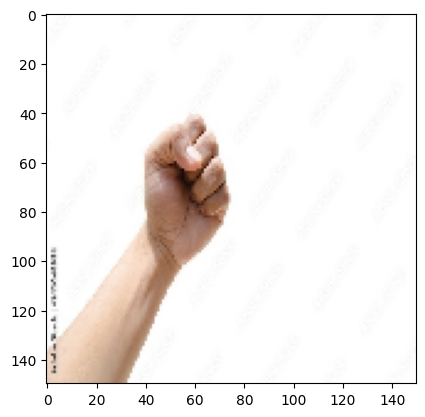

In [25]:
plt.imshow(images[0]);